2025-07-08 19:00:58.689993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


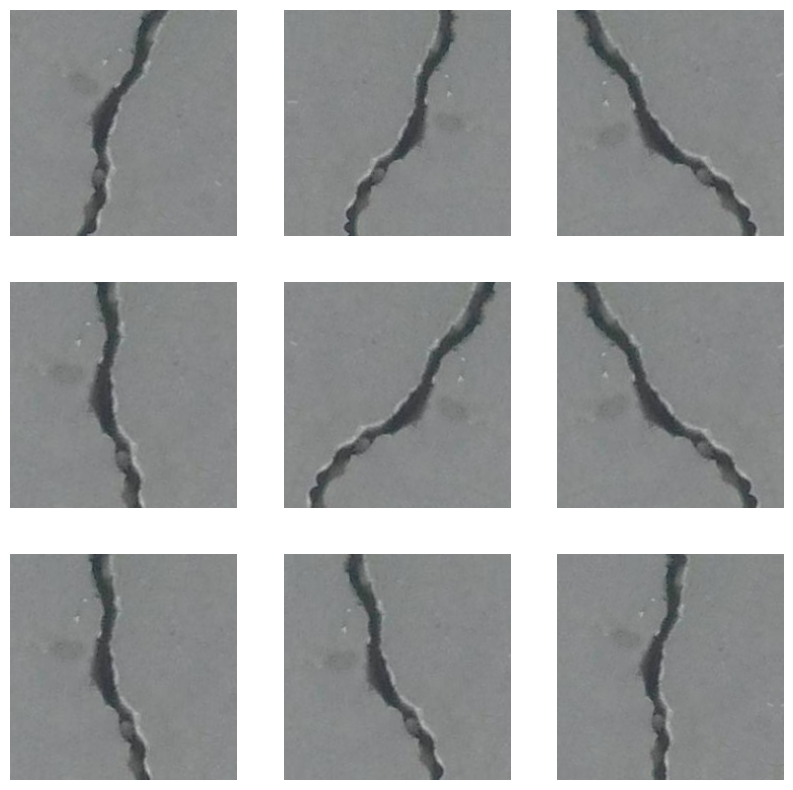

In [1]:
# train base model augmentation logic
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Visualize
image_path = "data/Positive/00001.jpg"  
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_img = data_augmentation(img_array)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    data_augmentation,             
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from module.dataloader import create_generators

data_dir = "data/baseline"
train_gen, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),    
    batch_size=16,
    val_split=0.2,
    augment=False           
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [6]:
# For local dev clear the cache (eg clear_session). for large scale models restart the jupyter kernel
#from tensorflow.keras import backend as K
#K.clear_session()

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    steps_per_epoch=5,       
    validation_steps=5
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 995ms/step - accuracy: 0.7575 - loss: 0.5640 - val_accuracy: 0.9875 - val_loss: 0.0976
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.9741 - loss: 0.0997 - val_accuracy: 0.9875 - val_loss: 0.0918
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 676ms/step - accuracy: 0.9856 - loss: 0.0673 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - accuracy: 0.9845 - loss: 0.0823 - val_accuracy: 0.9875 - val_loss: 0.0237
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 804ms/step - accuracy: 0.9958 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9700 - loss: 0.1013 - val_accuracy: 0.9875 - val_loss: 0.0230
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 739ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.9875 - val_loss: 0.0366
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - accuracy: 0.9898 - loss: 0.0266 - val_accuracy: 1.0000 - val_loss: 0.

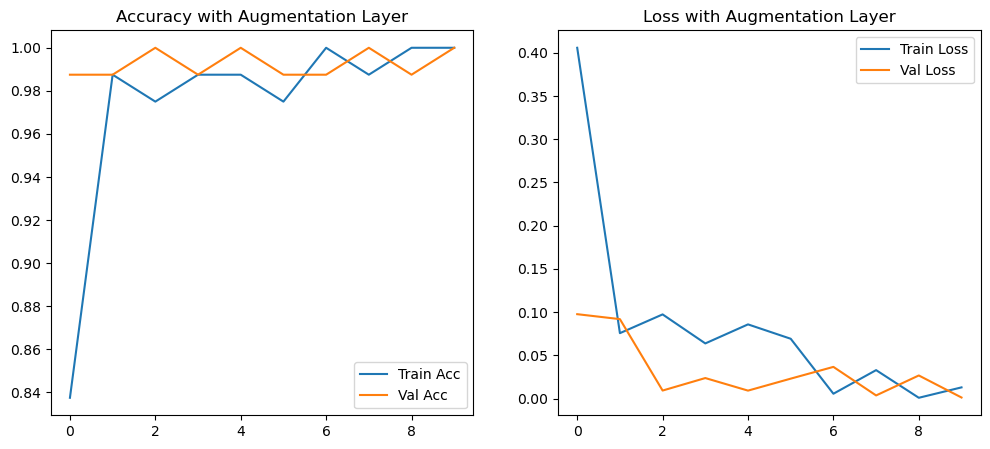

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy with Augmentation Layer')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss with Augmentation Layer')

plt.show()

In [8]:
model.save("models/augbasemodel.keras")

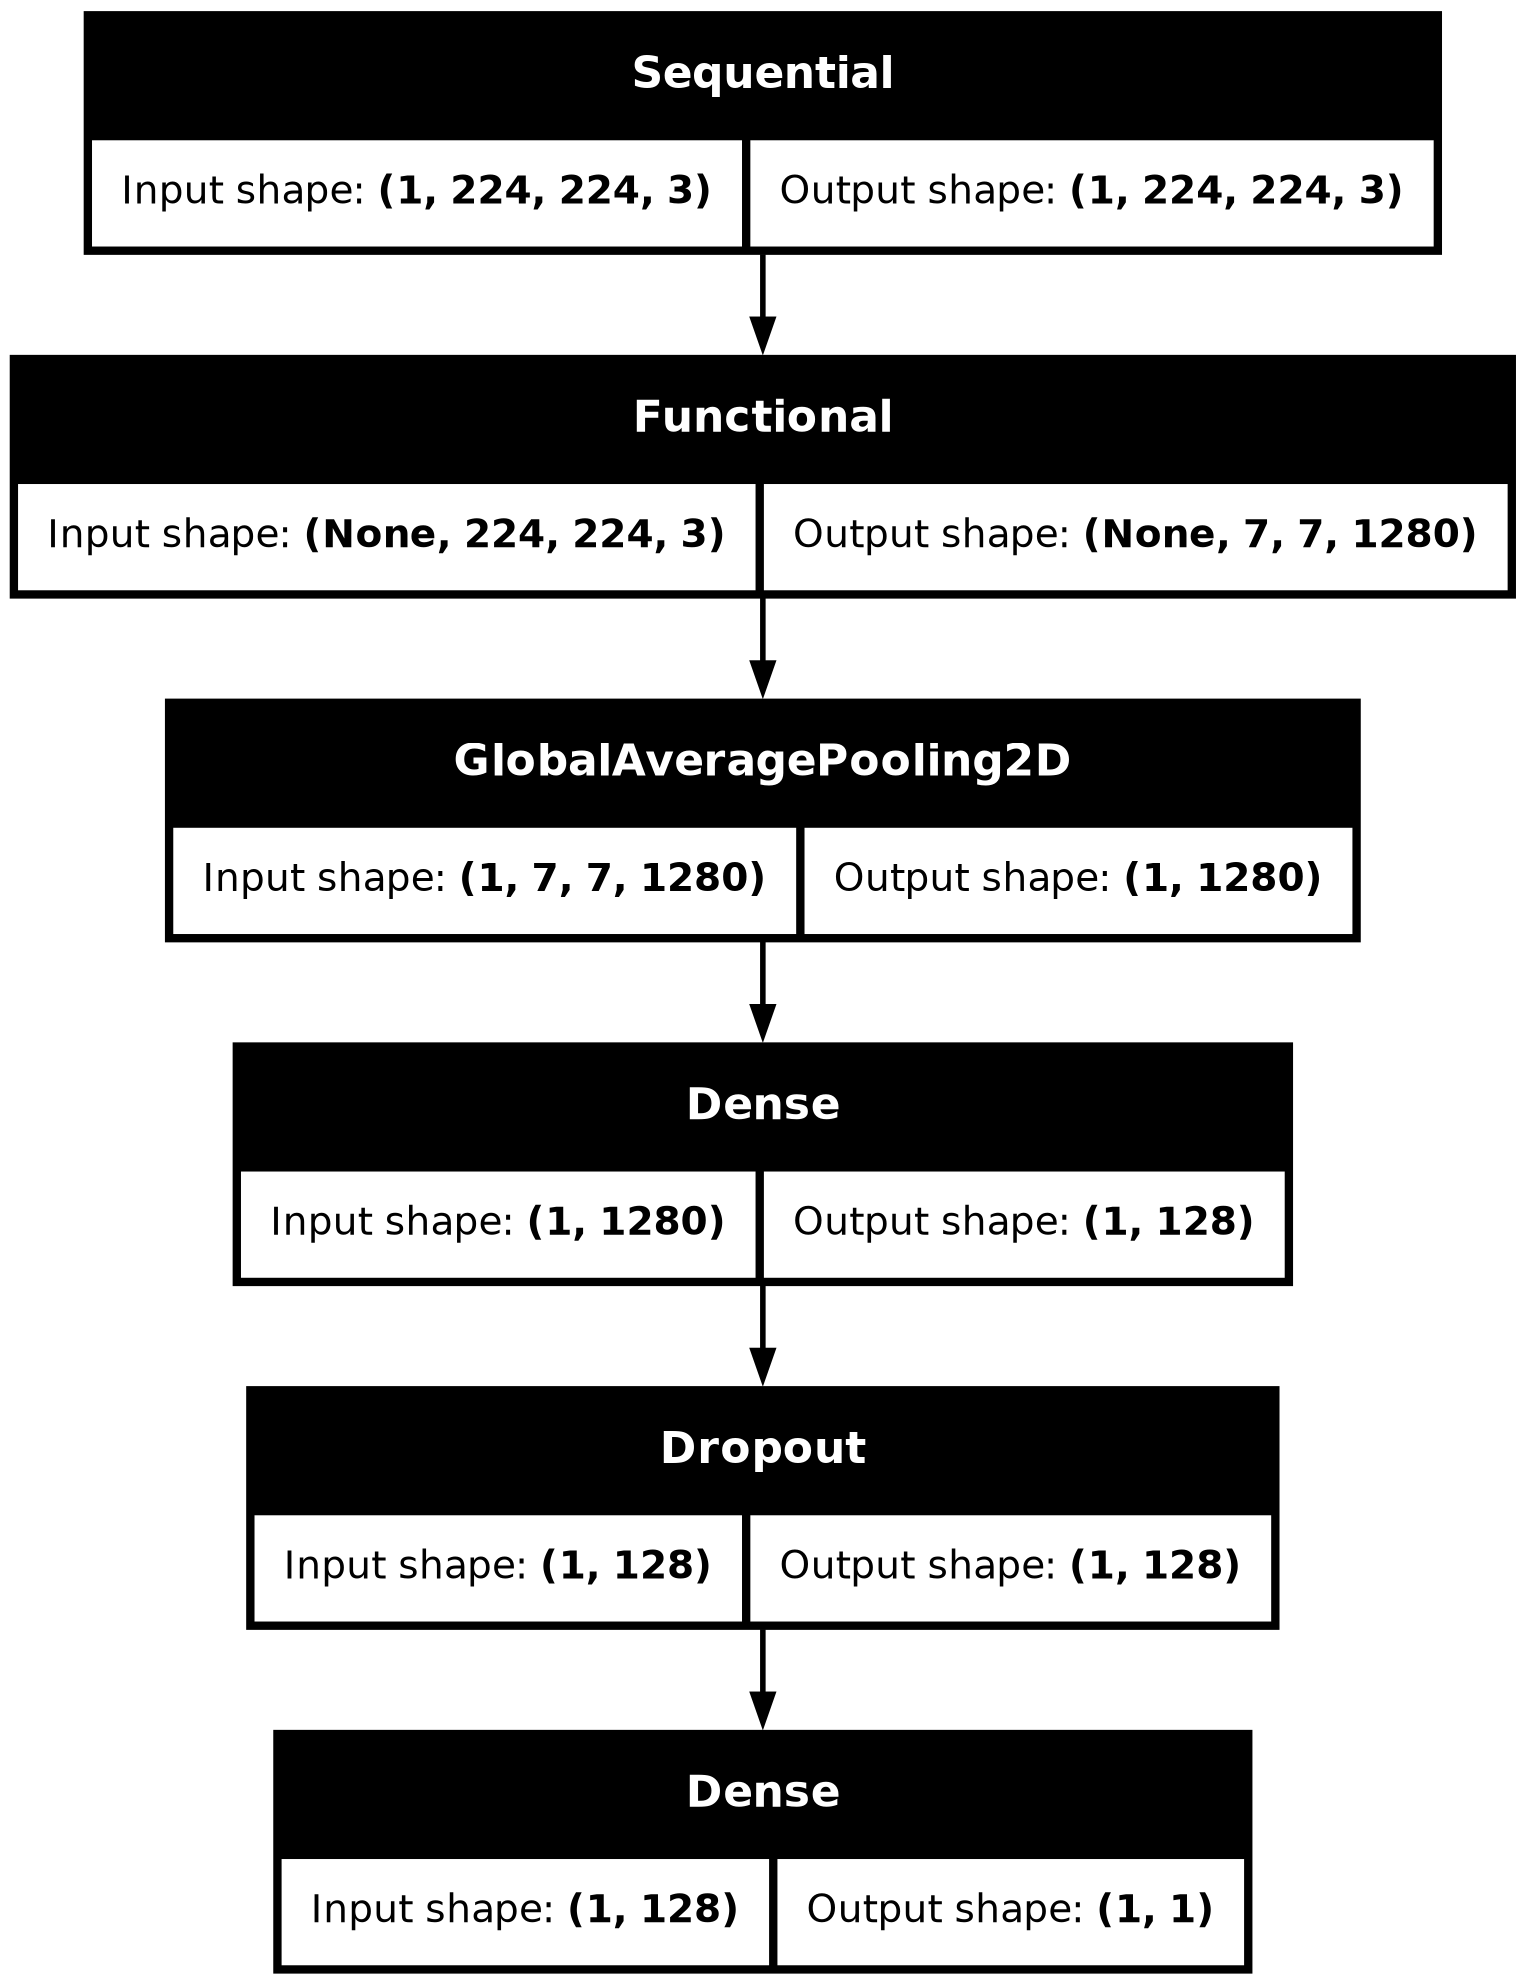

In [9]:
from tensorflow import keras
from IPython.display import Image, display

# Output model architecture
keras.utils.plot_model(model, show_shapes=True, to_file="models/augbasemodel.png")
display(Image(filename="models/augbasemodel.png", width=450))  

In [ ]:
# end of base model build with image augmentation logic passes.